In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Task:1 Finding Missing Values

In [3]:
df[df.isnull().any(axis=1)]
# Therfore wehave null values in society and balcony

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


## Task:2 Handling Missing Values

In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
impute.fit(X[:,6:8])
X[:,6:8]=impute.transform(X[:,6:8])

In [6]:
new_df=pd.DataFrame(X,columns=['area_type','availability','location','size','society','total_sqft','bath','balcony'])
new_df

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2,1
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5,1.58438
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2,1
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4,1


In [7]:
new_df[new_df.isnull().any(axis=1)]

,area_type,availability,location,size,society,total_sqft,bath,balcony
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2,1
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3,1
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6,1.58438
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2,2
...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2,2
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9,2
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2,2
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5,1.58438


In [8]:
df[['location','size','society']]=df[['location','size','society']].fillna(method='ffill')

In [9]:
df[['bath','balcony']]=new_df[['bath','balcony']]

In [10]:
df[df.isnull().any(axis=1)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


## Since there are no null values hence we've successfully handled all missing values

In [11]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Task:3 Dropping Unwanted columns

In [12]:
df=df.drop(['availability','society','balcony'],axis=1)

In [13]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2,51.00


In [14]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Task:4 Cleaning the Size column

In [15]:
df['size'].unique()
# Here 2BHK and 2 Bedroom are same hence we can replace them

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['bhk']=df['size'].apply(lambda x: x.split(' ')[0])

In [17]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2,51.00,2


In [18]:
df=df.drop('size',axis=1)

In [19]:
df.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5,120.00,4
2,Built-up Area,Uttarahalli,1440,2,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3,95.00,3
4,Super built-up Area,Kothanur,1200,2,51.00,2


## Task:5 Converting Str to Int of bhk feature

In [20]:
df['bhk']=df['bhk'].astype('int32')

## Task:6 Working on total_sqft feature

In [21]:
df['total_sqft'].unique()
## Here we see that some values are string but some are in range hence we've to work on it 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True

# here if the value is a simple string it would go into try block and gets converted to float
# But if the value is in a range then it would throw an exception/error hence it would go into except block

In [23]:
df[~df['total_sqft'].apply(to_float)]

# It gives us all the outlier values like range and values with unit

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.69261,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.69261,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2,54.005,2
...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,1804 - 2273,3,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2,72.760,2
13240,Super built-up Area,Devanahalli,1020 - 1130,2.69261,52.570,1
13265,Super built-up Area,Hoodi,1133 - 1384,2,59.135,2


In [24]:
def range_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
         return (float(tokens[0])/2+float(tokens[1])/2)
    try:
            return float(x)
    except:
            return None

In [25]:
range_to_num('2122')
# It converts str to float in the try block

2122.0

In [26]:
range_to_num('2100-2122')
# gives the average value for range

2111.0

In [27]:
df['total_sqft']=df['total_sqft'].apply(lambda x:range_to_num(x))

In [28]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                    2475
bath                             4
price                          186
bhk                              4
Name: 30, dtype: object

## Task:7 Feature Engineering

In [30]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [31]:
df.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2,51.00,2,4250.000000


In [32]:
len(df.location.unique())


1305

In [51]:
df.location=df.location.apply(lambda x: x.strip())
df.area_type=df.area_type.apply(lambda x: x.strip())
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats
# We can see that Whitefield has 541 data points/ has 541 rows 
# There are some location who have only 1 data point hence we can classify them into other category

location
other                   2573
Whitefield               540
Sarjapur  Road           396
Electronic City          295
Kanakpura Road           271
                        ... 
Thyagaraja Nagar           8
5th Block Hbr Layout       7
Vishveshwarya Layout       7
Vishwapriya Layout         7
Marsur                     5
Name: location, Length: 242, dtype: int64

In [52]:
location_less_than_10=location_stats[location_stats<=10]

In [53]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)
# This would replace if the location has less than 10 data points as othen else keep it as it is

In [54]:
df.head(20)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3,63.25,3,4828.244275
10,Super built-up Area,Whitefield,1800.0,2,70.00,3,3888.888889


In [55]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

## Task:8 Removing Outliers

In [56]:
df[df['total_sqft']/df['bhk']<300]
# here we see that a house having 600 sqft area cannot have 8 bhk hence this is an outlier

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft


In [57]:
# Here we remove all rows having outlier
df=df[~(df['total_sqft']/df['bhk']<300)]

In [58]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf['price_per_sqft']>m-sd) & (subdf['price_per_sqft']<=m+sd)]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

new_df=remove_outlier(df)
new_df.head(5)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,2825.0,4,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,1875.0,3,167.0,3,8906.666667
2,Built-up Area,1st Phase JP Nagar,1500.0,5,85.0,5,5666.666667
3,Super built-up Area,1st Phase JP Nagar,2065.0,4,210.0,3,10169.491525
4,Super built-up Area,1st Phase JP Nagar,2024.0,3,157.0,3,7756.916996


In [59]:
new_df[new_df['bath']>8]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
3758,Built-up Area,KR Puram,4600.0,9,200.0,9,4347.826087
5087,Super built-up Area,Mico Layout,5000.0,9,210.0,9,4200.000000
5247,Super built-up Area,Neeladri Nagar,4000.0,12,160.0,10,4000.000000
5630,Built-up Area,Raja Rajeshwari Nagar,3600.0,9,240.0,9,6666.666667
7990,Super built-up Area,other,5000.0,9,360.0,11,7200.000000
8287,Built-up Area,other,4400.0,9,120.0,7,2727.272727
8394,Super built-up Area,other,11338.0,9,1000.0,6,8819.897689
8475,Super built-up Area,other,12000.0,12,525.0,10,4375.000000
8569,Super built-up Area,other,10000.0,16,550.0,16,5500.000000
8620,Plot Area,other,4500.0,9,166.0,9,3688.888889


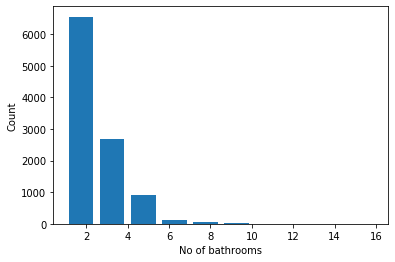

In [60]:
plt.hist(new_df['bath'],rwidth=0.8)
plt.xlabel('No of bathrooms')
plt.ylabel('Count')
plt.show()

In [61]:
len(new_df)

10326

In [62]:
new_df=new_df[~(new_df['bath']>(new_df['bhk']+2))]

In [63]:
new_df['bath'].unique()

array([4.0, 3.0, 5.0, 2.0, 1.0, 6.0, 8.0, 2.6926096474673513, 7.0, 9.0,
       12.0, 16.0, 13.0], dtype=object)

In [64]:
len(new_df)

10322

In [65]:
new_df.head(2)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,2825.0,4,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,1875.0,3,167.0,3,8906.666667


## Task:9 Training The model

In [82]:
X=new_df.iloc[:,[0,1,2,3,5,6]]
y=new_df.iloc[:,4].values

In [71]:
dummy=pd.get_dummies(new_df['location'])
dummy=dummy.drop('other',axis=1)

In [72]:
X=pd.concat([X,dummy],axis=1)

In [73]:
X.head()

,area_type,location,total_sqft,bath,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Phase JP Nagar,2825.0,4,4,8849.557522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Phase JP Nagar,1875.0,3,3,8906.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,1st Phase JP Nagar,1500.0,5,5,5666.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Phase JP Nagar,2065.0,4,3,10169.491525,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Phase JP Nagar,2024.0,3,3,7756.916996,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X=X.drop('location',axis=1)

In [79]:
x=X.iloc[:,:].values

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[0])],remainder="passthrough")

# Since ct.fit_transform doesn't return an array and since our model only requires array and X is also in a form of array hence 
# np.array(ct...)
x=np.array(ct.fit_transform(x))

In [81]:
x[0,:]

array([0.0, 0.0, 0.0, 1.0, 2825.0, 4.0, 4, 8849.557522123894, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

In [83]:
y

array([250.  , 167.  ,  85.  , ...,  63.93,  48.  , 400.  ])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
regressor.score(X_test,y_test)

0.940114965982353

In [88]:
from xgboost import XGBRegressor
reg=XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [89]:
reg.score(X_test, y_test)

0.9926336044206538